In [1]:
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_fscore_support
import warnings


import nltk
nltk.download('vader_lexicon', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('omw', quiet=True)
import nltk
import nltk

# Specify the path to the directory containing NLTK data
nltk.data.path.append("C:/Users/Administrator/Desktop/nltk_data_directory")

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading omw: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [2]:
# Import the Excel data file
excel_file_path = "C:/Users/Administrator/Desktop/dataset/Resturant review.xlsx"
data = pd.read_excel(excel_file_path)
# Display the data
print(data)

       Rating                                        Review Text
0           5  All I can say is they have very good ice cream...
1           4  Nice little local place for ice cream.My favor...
2           5  A delicious treat on a hot day! Staff was very...
3           4  This was great service and a fun crew! I got t...
4           5  This is one of my favorite places to get ice c...
...       ...                                                ...
19891       4  Had the chocolate cannoli! The filling was ric...
19892       4  Love apricot croissant! I bought it at 4:00 PM...
19893       4  Line was about 25 people long. It went fast! T...
19894       5  Its hard not to order everything when I come h...
19895       4  Every mall needs an Eataly for real. La Pastic...

[19896 rows x 2 columns]


In [3]:
# display the dataframe
data.head()

,Rating,Review Text
0,5,All I can say is they have very good ice cream...
1,4,Nice little local place for ice cream.My favor...
2,5,A delicious treat on a hot day! Staff was very...
3,4,This was great service and a fun crew! I got t...
4,5,This is one of my favorite places to get ice c...


In [4]:
data.info

<bound method DataFrame.info of        Rating                                        Review Text
0           5  All I can say is they have very good ice cream...
1           4  Nice little local place for ice cream.My favor...
2           5  A delicious treat on a hot day! Staff was very...
3           4  This was great service and a fun crew! I got t...
4           5  This is one of my favorite places to get ice c...
...       ...                                                ...
19891       4  Had the chocolate cannoli! The filling was ric...
19892       4  Love apricot croissant! I bought it at 4:00 PM...
19893       4  Line was about 25 people long. It went fast! T...
19894       5  Its hard not to order everything when I come h...
19895       4  Every mall needs an Eataly for real. La Pastic...

[19896 rows x 2 columns]>

# EXPLORATORY DATA ANALYSIS (EDA)

In [5]:
data.shape

(19896, 2)

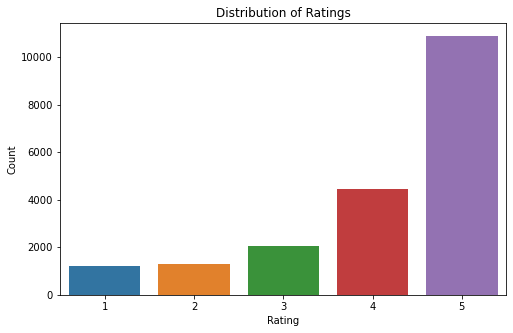

In [6]:
# Distribution of ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='Rating', data=data)  
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

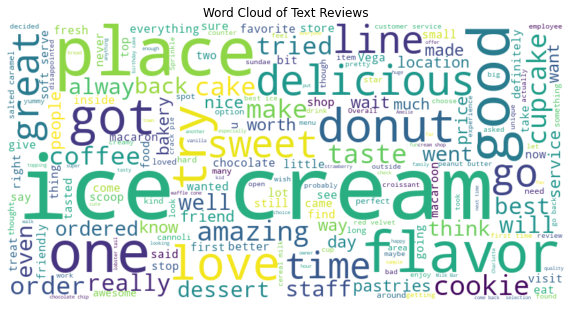

In [7]:
#Combine all the text_reviews into a single string
all_reviews_text = " ".join(review for review in data['Review Text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Reviews')
plt.show()

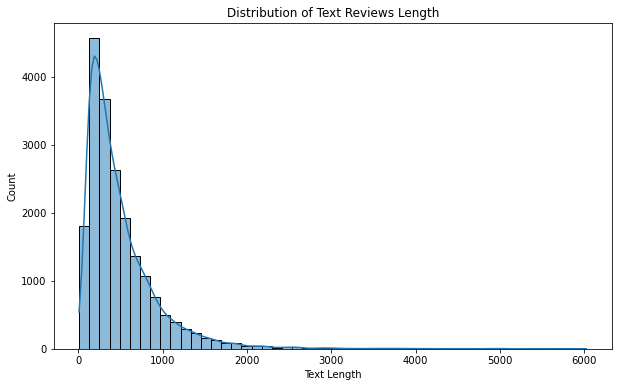

In [8]:
#Text reviews length distribution
data['text_length'] = data['Review Text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='text_length', bins=50, kde=True)
plt.title('Distribution of Text Reviews Length')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

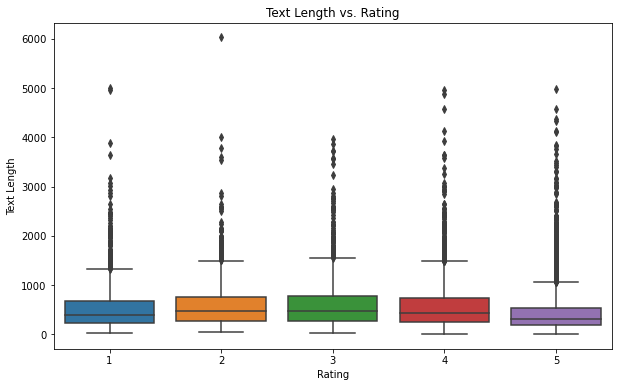

In [9]:
#Explore any patterns between text length and ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='text_length', data=data)
plt.title('Text Length vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Text Length')
plt.show()

# CHECKING FOR MISSING VALUES 

In [10]:
# Check for missing values and print the number of missing values per column
missing_values = data.isnull().sum()
print("Number of missing values per column:")
print(missing_values)

# Handle missing values
# fill missing values in numeric columns with the mean and in text columns with an empty string.
data['Rating'].fillna(data['Rating'].mean(), inplace=True)
data['Review Text'].fillna('', inplace=True)

# Remove duplicates
data.drop_duplicates(inplace=True)

# Formatting columns (if needed)
# For example, you can convert text to lowercase or format date columns.
data['Review Text'] = data['Review Text'].str.lower()

# Save the preprocessed data to a new CSV file if desired
data.to_csv('preprocessed_dataset.csv', index=False)

Number of missing values per column:
Rating         0
Review Text    0
text_length    0
dtype: int64


In [11]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Ignore UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Load preprocessed dataset into a Pandas DataFrame
data = pd.read_csv('preprocessed_dataset.csv')

# Define a function for text preprocessing
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize and lowercase the text
    words = word_tokenize(text.lower())
    
    # Remove stopwords, punctuation, and special characters
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
    
    # You can perform stemming or lemmatization here if desired
    
    return ' '.join(filtered_words)

# Apply text preprocessing to your text_column_name and create a new column for preprocessed text
data['preprocessed_text'] = data['Review Text'].apply(preprocess_text)

# Create a TF-IDF matrix to represent text data numerically
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(data['preprocessed_text'])

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [12]:
# Create a new TF-IDF matrix
tfidata_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
tfidata_matrix = tfidata_vectorizer.fit_transform(data['preprocessed_text'])
tfidata_data = pd.DataFrame(tfidata_matrix.toarray(), columns=tfidata_vectorizer.get_feature_names_out())
print(tfidata_data.head())

         10   12   15        20   24   30  able  absolute  absolutely  across  \
0  0.000000  0.0  0.0  0.000000  0.0  0.0   0.0       0.0         0.0     0.0   
1  0.000000  0.0  0.0  0.000000  0.0  0.0   0.0       0.0         0.0     0.0   
2  0.000000  0.0  0.0  0.000000  0.0  0.0   0.0       0.0         0.0     0.0   
3  0.000000  0.0  0.0  0.000000  0.0  0.0   0.0       0.0         0.0     0.0   
4  0.124001  0.0  0.0  0.138556  0.0  0.0   0.0       0.0         0.0     0.0   

   ...  year  years  yelp  yes  yet  yogurt  york  young       yum  yummy  
0  ...   0.0    0.0   0.0  0.0  0.0     0.0   0.0    0.0  0.000000    0.0  
1  ...   0.0    0.0   0.0  0.0  0.0     0.0   0.0    0.0  0.000000    0.0  
2  ...   0.0    0.0   0.0  0.0  0.0     0.0   0.0    0.0  0.000000    0.0  
3  ...   0.0    0.0   0.0  0.0  0.0     0.0   0.0    0.0  0.207449    0.0  
4  ...   0.0    0.0   0.0  0.0  0.0     0.0   0.0    0.0  0.000000    0.0  

[5 rows x 1000 columns]


# TEXT ANALYSIS USING NATURAL LANGUAGE AND MACHINE LEARNING 

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.exceptions import UndefinedMetricWarning

# Ignore UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)


# Define a function to perform sentiment analysis using Naive Bayes
def sentiment_analysis_naive_bayes(texts, labels):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)
    
    # Vectorize the text data using TF-Idata
    tfidata_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
    X_train_tfidata = tfidata_vectorizer.fit_transform(X_train)
    X_test_tfidata = tfidata_vectorizer.transform(X_test)
    
    # Train a Naive Bayes classifier
    nb_classifier = MultinomialNB()
    nb_classifier.fit(X_train_tfidata, y_train)
    
    # Predict sentiments
    y_pred = nb_classifier.predict(X_test_tfidata)
    
    # Evaluate and print results
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print("Naive Bayes Sentiment Analysis Results:")
    print(f"Accuracy: {accuracy:.2f}")
    print(report)



# Define a function to perform sentiment analysis using VADER SentimentIntensityAnalyzer
def sentiment_analysis_vader(texts):
    vader = SentimentIntensityAnalyzer()
    sentiments = [vader.polarity_scores(text)['compound'] for text in texts]
    
    # Classify sentiments as positive, negative, or neutral based on the compound score
    labels = []
    for score in sentiments:
        if score >= 0.05:
            labels.append("positive")
        elif score <= -0.05:
            labels.append("negative")
        else:
            labels.append("neutral")
    
    # Print results
    print("VADER Sentiment Analysis Results:")
    print(f"Positive: {labels.count('positive')} reviews")
    print(f"Negative: {labels.count('negative')} reviews")
    print(f"Neutral: {labels.count('neutral')} reviews")

# Perform sentiment analysis using the three methods
sentiment_analysis_naive_bayes(data['preprocessed_text'], data['Review Text'])
sentiment_analysis_vader(data['preprocessed_text'])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



VADER Sentiment Analysis Results:
Positive: 18720 reviews
Negative: 954 reviews
Neutral: 222 reviews


# FEATURE ENGINEERING 

In [14]:
import pandas as pd
import nltk
import spacy
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize NLTK's SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Define a function to calculate sentiment intensity
def get_sentiment_intensity(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

# Calculate sentiment intensity for each review and create a new column
data['sentiment_intensity'] = data['preprocessed_text'].apply(get_sentiment_intensity)

# Calculate word counts for each review and create a new column
data['word_count'] = data['preprocessed_text'].apply(lambda x: len(x.split()))

# Initialize spaCy for Named Entity Recognition (NER)
nlp = spacy.load('en_core_web_sm')

# Define a function to extract named entities (e.g., persons, organizations)
def extract_named_entities(text):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]
    return ', '.join(entities)

# Extract named entities for each review and create a new column
data['named_entities'] = data['preprocessed_text'].apply(extract_named_entities)

# Print the DataFrame with the new features
print(data[['sentiment_intensity', 'word_count', 'named_entities']])

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


       sentiment_intensity  word_count  \
0                   0.8625          12   
1                   0.9648          30   
2                   0.9081          16   
3                   0.9618          38   
4                   0.9900          83   
...                    ...         ...   
19891               0.8074          11   
19892               0.9643          32   
19893               0.9300          35   
19894               0.6369          14   
19895               0.9584          59   

                                          named_entities  
0                                                         
1                                                         
2                                                    day  
3                              graham crackers chocolate  
4              one, 10 minutes, urbana, 20 minute, night  
...                                                  ...  
19891                                                     
19892                  

In [16]:
from nltk.corpus import stopwords
from gensim import corpora
# Tokenize the text data and remove stopwords
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

tokenized_reviews = data['preprocessed_text'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(tokenized_reviews)

# Create a document-term matrix
doc_term_matrix = [dictionary.doc2bow(tokens) for tokens in tokenized_reviews]

# Apply LDA model to discover topics
lda_model = LdaModel(
    corpus=doc_term_matrix,
    id2word=dictionary,
    num_topics=5,  # Adjust the number of topics as needed
    random_state=42,
    passes=10  # Adjust the number of passes for convergence
)

# Print the topics and their top words
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


(0, '0.014*"line" + 0.012*"time" + 0.009*"one" + 0.009*"get" + 0.009*"order" + 0.008*"back" + 0.008*"people" + 0.008*"service" + 0.008*"us" + 0.007*"would"')
(1, '0.060*"cream" + 0.056*"ice" + 0.015*"flavors" + 0.014*"place" + 0.010*"great" + 0.010*"good" + 0.008*"chocolate" + 0.007*"love" + 0.007*"delicious" + 0.007*"best"')
(2, '0.016*"place" + 0.016*"coffee" + 0.012*"great" + 0.012*"good" + 0.010*"delicious" + 0.010*"love" + 0.009*"also" + 0.008*"bakery" + 0.007*"little" + 0.007*"go"')
(3, '0.018*"cake" + 0.017*"milk" + 0.016*"like" + 0.013*"soft" + 0.012*"good" + 0.012*"serve" + 0.010*"chocolate" + 0.009*"cereal" + 0.009*"cookie" + 0.009*"cookies"')
(4, '0.050*"donuts" + 0.048*"donut" + 0.015*"cupcake" + 0.013*"cupcakes" + 0.010*"vegas" + 0.009*"good" + 0.009*"creme" + 0.009*"red" + 0.008*"best" + 0.008*"one"')


# UNSUPERVISED LEARNING 

In [23]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer  # Add this line

tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Corrected the spelling
tfidf_matrix = tfidf_vectorizer.fit_transform(data['preprocessed_text'])

# Define the number of clusters (K)
K = 5  # Adjust this based on your specific problem

# Apply K-means clustering
kmeans = KMeans(n_clusters=K, random_state=42)
clusters = kmeans.fit_predict(tfidata_matrix)

# Add the cluster labels to your DataFrame
data['cluster'] = clusters

# Print the cluster assignments for each data point
print(data[['preprocessed_text', 'cluster']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                       preprocessed_text  cluster
0      say good ice cream would sure recommend cookie...        3
1      nice little local place ice favorite pumpkin s...        3
2      delicious treat hot day staff friendly helpful...        2
3      great service fun crew got banana cream pie ch...        3
4      one favorite places get ice cream cu area bit ...        3
...                                                  ...      ...
19891  chocolate cannoli filling rich delicious canno...        2
19892  love apricot croissant bought pm normally brea...        2
19893  line 25 people long went fast variety pastries...        2
19894  hard order everything come good also order ins...        2
19895  every mall needs eataly real la pasticceria pa...        2

[19896 rows x 2 columns]


In [24]:
data.head()

,Rating,Review Text,text_length,preprocessed_text,sentiment_intensity,word_count,named_entities,cluster
0,5,all i can say is they have very good ice cream...,123,say good ice cream would sure recommend cookie...,0.8625,12,,3
1,4,nice little local place for ice cream.my favor...,290,nice little local place ice favorite pumpkin s...,0.9648,30,,3
2,5,a delicious treat on a hot day! staff was very...,131,delicious treat hot day staff friendly helpful...,0.9081,16,day,2
3,4,this was great service and a fun crew! i got t...,374,great service fun crew got banana cream pie ch...,0.9618,38,graham crackers chocolate,3
4,5,this is one of my favorite places to get ice c...,848,one favorite places get ice cream cu area bit ...,0.9900,83,"one, 10 minutes, urbana, 20 minute, night",3


# WORD CLOUD FOR EACH TOPIC DISCUSSED 

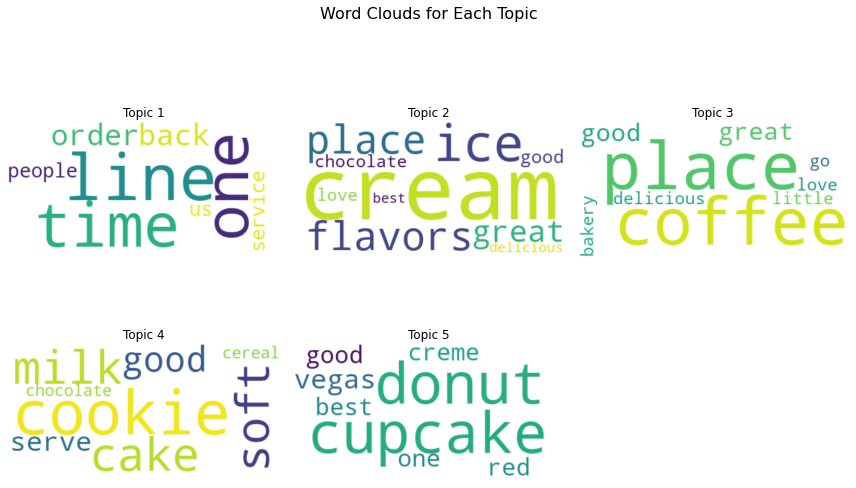

In [18]:
# Create word clouds for each topic
plt.figure(figsize=(12, 8))
for topic_num, words in topics:
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(words)
    plt.subplot(2, 3, topic_num + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {topic_num + 1}")

plt.suptitle("Word Clouds for Each Topic", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [19]:
#FEEDBACK ANALYSIS
def feedback_analysis(data, keyword_dict):
    # Create an empty dictionary to store the counts for each feedback category
    feedback_counts = {category: 0 for category in keyword_dict.keys()}

    # Iterate through the processed reviews and classify them into feedback categories based on keywords
    for review in data['preprocessed_text']:
        for category, keywords in keyword_dict.items():
            for keyword in keywords:
                if keyword in review:
                    feedback_counts[category] += 1
                    break  # Exit the loop after finding the first matching keyword

    return feedback_counts

# Define the keywords for each feedback category
keyword_dict = {
    'complaints': ['problem', 'issue', 'disappointing', 'poor', 'bad'],
    'suggestions': ['suggest', 'improve', 'recommend', 'enhance'],
    'praises': ['excellent', 'wonderful', 'fantastic', 'great', 'amazing']
}

# Perform feedback analysis
feedback_counts = feedback_analysis(data, keyword_dict)

# Print the counts for each feedback category
for category, count in feedback_counts.items():
    print(f"Number of reviews in {category} category: {count}")

Number of reviews in complaints category: 1660
Number of reviews in suggestions category: 2394
Number of reviews in praises category: 7708


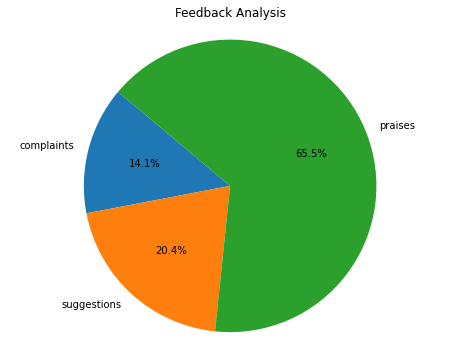

In [20]:
# Convert the feedback counts dictionary to lists for plotting
categories = list(feedback_counts.keys())
counts = list(feedback_counts.values())

# Plot the results as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.title('Feedback Analysis')
plt.show()

In [21]:
from sklearn.metrics import classification_report
def nlp_based_predictions(data, keyword_dict):
    # Create a list of tokenized documents from the 'processed_reviews' column
    documents = [review for review in data['preprocessed_text']]

    # Create a CountVectorizer with specified keywords as features
    vectorizer = CountVectorizer(vocabulary=keyword_dict.keys())

    # Extract features (word frequencies) from the reviews
    X = vectorizer.fit_transform(documents)
    y = data['Rating'].apply(lambda rating: 'positive' if rating > 3 else 'negative' if rating < 3 else 'neutral')

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build a Naive Bayes classifier
    classifier = MultinomialNB()
    classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Calculate accuracy and print classification report
    accuracy = accuracy_score(y_test, y_pred)
    report_result = classification_report(y_test, y_pred)

    return accuracy, report_result

# Define the keywords for each sentiment category (positive, neutral, and negative)
keyword_dict = {
    'positive': ['positive', 'great', 'excellent', 'fantastic', 'wonderful'],
    'neutral': ['neutral', 'average', 'ok', 'satisfactory'],
    'negative': ['negative', 'poor', 'bad', 'disappointing', 'awful']
}

# Perform NLP-based predictions
accuracy, report = nlp_based_predictions(data, keyword_dict)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       516
     neutral       0.00      0.00      0.00       401
    positive       0.77      1.00      0.87      3063

    accuracy                           0.77      3980
   macro avg       0.26      0.33      0.29      3980
weighted avg       0.59      0.77      0.67      3980

